In [30]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df_base = pd.read_csv("agent_47_base/train_stats.csv")
df = pd.read_csv("agent_47/train_stats.csv")

print("df sommaire")
display( df.describe() )

print("df valeurs manquantes")
display( df.isna().sum().to_frame().T )

print("df valeurs dupliqueess")
dup = df.duplicated(keep="last")
display( df[dup] )

df sommaire


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeDuration
count,548.0,548.000000,548.000000,548.000000,548.000000,5.480000e+02,548.000000
mean,0.0,273.500000,152.520073,22.565693,2392.711679,3.649635e-02,2.578208
std,0.0,158.338246,76.770114,12.219402,1435.029896,1.319692e-01,1.340692
min,0.0,0.000000,2.000000,0.000000,-103.900000,6.528480e-13,0.010288
25%,0.0,136.750000,84.000000,11.000000,991.525000,7.264660e-10,1.401690
50%,0.0,273.500000,182.000000,32.000000,3081.300000,8.082559e-07,3.039996
75%,0.0,410.250000,213.000000,33.000000,3682.425000,8.991063e-04,3.637557
max,0.0,547.000000,315.000000,33.000000,3689.100000,1.000000e+00,5.343541


df valeurs manquantes


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeDuration
0,0,0,0,0,0,0,0


df valeurs dupliqueess


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeDuration


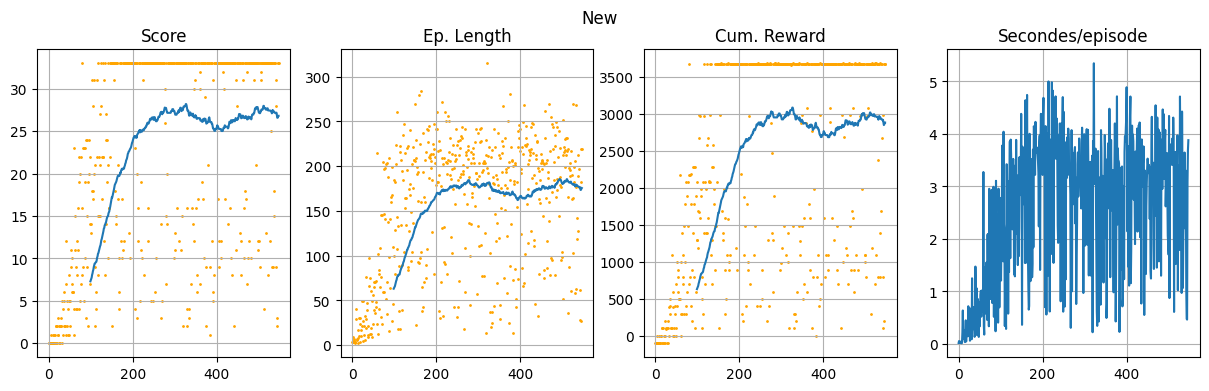

Total time: 1412.86
Max Score: 33 a 79
Max Cum. Reward: 3689.1 a 536


In [32]:
def graph(df, title, ROLLING=100):
    plt.figure(figsize=(15, 4))

    plt.subplot(141)
    plt.plot(df.Episode, df.Score.rolling(ROLLING).mean())
    plt.scatter(df.Episode, df.Score, s=1, color="orange")
    plt.title("Score")
    plt.grid()

    plt.subplot(142)
    plt.plot(df.Episode, df.EpisodeLength.rolling(ROLLING).mean())
    plt.scatter(df.Episode, df.EpisodeLength, s=1, color="orange")
    plt.title("Ep. Length")
    plt.grid()

    plt.subplot(143)
    if False:
        plt.plot(df.Episode, df.Epsilon)
        plt.title("Epsilon")
    else:
        plt.plot(df.Episode, df.CumulativeReward.rolling(ROLLING).mean())
        plt.scatter(df.Episode, df.CumulativeReward, s=1, color="orange")
        plt.title("Cum. Reward")
    plt.grid()

    plt.subplot(144)
    plt.plot(df.Episode, df.EpisodeDuration)
    plt.title("Secondes/episode")
    plt.grid()

    plt.suptitle(title)
    plt.show()

    runtime = df.EpisodeDuration.sum()
    print("Total time:", round(runtime, 2))
    print("Max Score:", df.Score.max(), "a", df.Score.argmax())
    print("Max Cum. Reward:", df.CumulativeReward.max().round(3), "a", df.CumulativeReward.argmax())

# graph(df_base, "Base")
graph(df, "New")